<a href="https://colab.research.google.com/github/darwinagudeloh/FDL_2024-2_UDEA/blob/main/04_Modelo_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!wget https://raw.githubusercontent.com/darwinagudeloh/FDL_2024-2_UDEA/refs/heads/main/03_Preprocesamiento_Datos.ipynb

--2024-11-20 23:06:32--  https://raw.githubusercontent.com/darwinagudeloh/FDL_2024-2_UDEA/refs/heads/main/03_Preprocesamiento_Datos.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4743 (4.6K) [text/plain]
Saving to: ‘03_Preprocesamiento_Datos.ipynb.1’

03_Preprocesamiento 100%[===================>]   4.63K  --.-KB/s    in 0s      

2024-11-20 23:06:32 (43.5 MB/s) - ‘03_Preprocesamiento_Datos.ipynb.1’ saved [4743/4743]



In [11]:
%run /content/03_Preprocesamiento_Datos.ipynb

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
# Inspeccionar las dimensiones de los conjuntos
print("Tamaños de los conjuntos:")
print(f"Entrenamiento: X={X_train.shape}, y={y_train.shape}")
print(f"Prueba: X={X_test.shape}, y={y_test.shape}")

Tamaños de los conjuntos:
Entrenamiento: X=(2892, 30, 5), y=(2892, 7)
Prueba: X=(724, 30, 5), y=(724, 7)


In [16]:
# Crear el modelo
model = Sequential([
    LSTM(
        32,
        activation='tanh',
        input_shape=(window_size, 5),
        kernel_regularizer=l2(0.001),  # Regularización L2
        return_sequences=False  # Última salida de la secuencia
    ),
    Dropout(0.3),  # Apagar 30% de las unidades
    Dense(forecast_horizon, kernel_regularizer=l2(0.001))  # Regularización L2 en salida
])
# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 32)                  │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,095 (19.90 KB)

 Trainable params: 5,095 (19.90 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Entrenar el modelo
history=model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.1088 - mae: 0.2380 - val_loss: 0.0424 - val_mae: 0.1259
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0478 - mae: 0.1423 - val_loss: 0.0376 - val_mae: 0.1236
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0405 - mae: 0.1328 - val_loss: 0.0342 - val_mae: 0.1227
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0364 - mae: 0.1293 - val_loss: 0.0321 - val_mae: 0.1220
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0340 - mae: 0.1286 - val_loss: 0.0307 - val_mae: 0.1217
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0316 - mae: 0.1254 - val_loss: 0.0294 - val_mae: 0.1216
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0300 - mae: 0.1240 - val_loss: 0.0280 - val_mae: 0.1216
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0283 - mae: 0.1231 - val_loss: 0.0271 - val_mae: 0.1216
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.027

<function matplotlib.pyplot.show(close=None, block=None)>

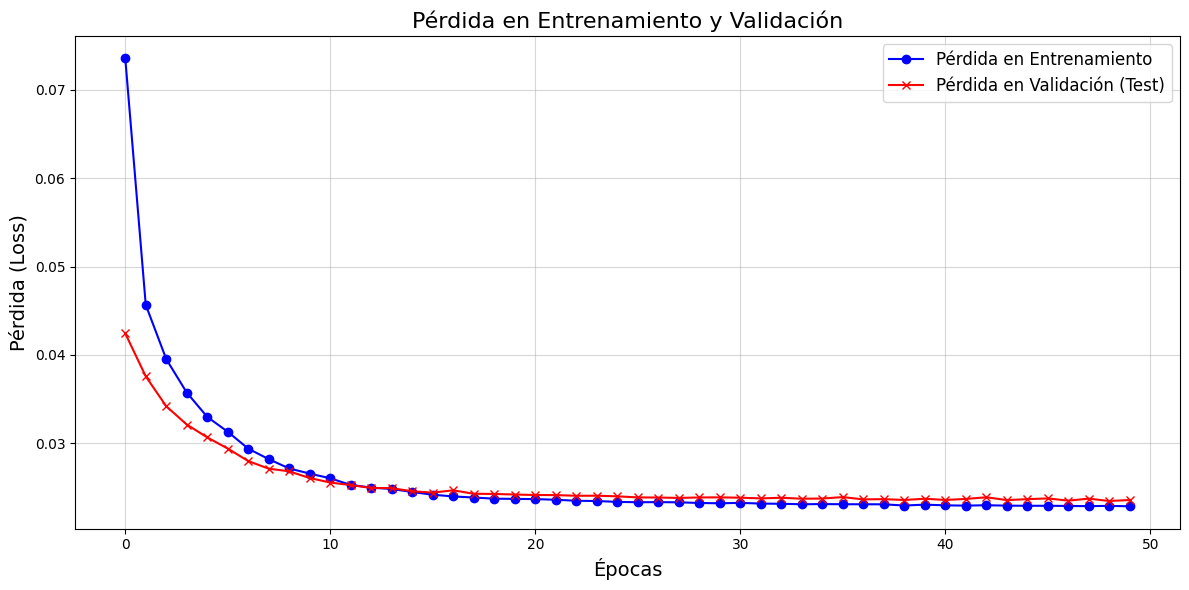

In [19]:
# Graficar el Proceso de Entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento', marker='o', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida en Validación (Test)', marker='x', color='red')
plt.title('Pérdida en Entrenamiento y Validación', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Pérdida (Loss)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show

In [20]:
# Evaluar el Modelo
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Squared Error (MSE): {loss:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - mae: 0.1208
Mean Squared Error (MSE): 0.0235
Mean Absolute Error (MAE): 0.1210


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step


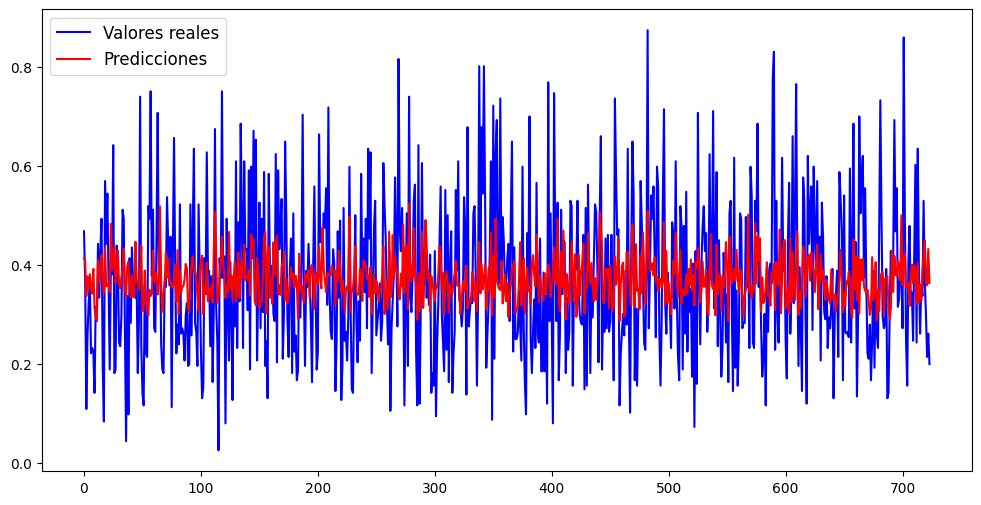

In [21]:
# Realizar predicciones
predicciones = model.predict(X_test)

# Graficar predicciones vs valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_test[:,0], label='Valores reales', color='blue')
plt.plot(predicciones[:,0], label='Predicciones', color='red')
plt.legend(fontsize=12)
plt.show()